# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [38]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from datetime import datetime, timedelta
from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

In [39]:
# Read your api key environment variable
# Load .env enviroment variables
load_dotenv()

# Set News API Key
api_key=os.environ["NEWSAPI_KEY"]

In [40]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [41]:
# Fetch the Bitcoin news articles
current_date = pd.Timestamp("2020-12-12", tz="America/New_York").isoformat()
bitcoin_articles = newsapi.get_everything(
    q="Bitcoin", language="en", sort_by="relevancy"
)

In [42]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(
    q="Ethereum", language="en", sort_by="relevancy"
)

In [43]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/admin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [44]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        #date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        text = article["content"]
        #date = article["publishedAt"][:10]
        
        bitcoin_sentiments.append({
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "text": text
            #"date": date,
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.6705,0.199,0.737,0.064,A former Microsoft software engineer from Ukra...
1,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
2,0.2144,0.000,0.947,0.053,PayPal is bringing its newly-announced support...
3,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."
4,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."


In [15]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        #date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        text = article["content"]
        #date = article["publishedAt"][:10]
        
        ethereum_sentiments.append({
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "text": text
            #"date": date,
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.2144,0.0,0.947,0.053,PayPal is bringing its newly-announced support...
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
3,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
4,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...


In [16]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.170479,0.014421,0.928684,0.056895
std,0.328269,0.047886,0.087898,0.066958
min,-0.670500,0.000000,0.737000,0.000000
25%,0.000000,0.000000,0.860500,0.000000
50%,0.000000,0.000000,0.950000,0.050000
75%,0.411700,0.000000,1.000000,0.102500
max,0.765000,0.199000,1.000000,0.174000


In [17]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.122565,0.021050,0.918000,0.060950
std,0.320198,0.054473,0.105304,0.078682
min,-0.493900,0.000000,0.672000,0.000000
25%,0.000000,0.000000,0.876000,0.000000
50%,0.000000,0.000000,0.948000,0.052000
75%,0.261275,0.000000,1.000000,0.095250
max,0.877900,0.196000,1.000000,0.318000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the higher mean positive score of 0.060950

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score of 0.877900

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score of 0.318000

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [19]:
# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))
sw_addons = {'FILE', 'PHOTO', 'Reuters', 'char'}

In [20]:
lemmatizer = WordNetLemmatizer()

In [21]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return output

In [22]:
# Create a new tokens column for bitcoin
article_words = []

for index, article in bitcoin_df.iterrows():
    try:
        
        words = tokenizer(article["text"])
        article_words.append({"tokens": words})
        
    except AttributeError:
        pass


article_words_df = pd.DataFrame(article_words)
bitcoin_df = bitcoin_df.join(article_words_df)

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.6705,0.199,0.737,0.064,A former Microsoft software engineer from Ukra...,"[former, microsoft, software, engineer, ukrain..."
1,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[visahas, partnered, cryptocurrency, startup, ..."
2,0.2144,0.000,0.947,0.053,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
3,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, twomonth, rall..."
4,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, conventional, cryptocurrencies, centr..."


In [23]:
# Create a new tokens column for ethereum
article_words = []

for index, article in ethereum_df.iterrows():
    try:
        
        words = tokenizer(article["text"])
        article_words.append({"tokens": words})
        
    except AttributeError:
        pass


article_words_df = pd.DataFrame(article_words)
ethereum_df = ethereum_df.join(article_words_df)

ethereum_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.2144,0.0,0.947,0.053,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
2,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
3,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[london, reuters, digital, currency, ethereum,..."
4,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...,"[new, york, reuters, institutional, investor, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [24]:
from collections import Counter
from nltk import ngrams

In [25]:
# Generate Bitcoin Tokens
bitcoin_words = []

for index, article in bitcoin_df.iterrows():
    try:
        bitcoin_words.extend(article["tokens"])
        
    except AttributeError:
        pass

In [26]:
# Generate Ethereum Tokens
ethereum_words = []

for index, article in ethereum_df.iterrows():
    try:
        ethereum_words.extend(article["tokens"])
        
    except AttributeError:
        pass

In [27]:
# Generate the Bitcoin N-grams where N=2
bitcoin_bigram_counts = Counter(ngrams(bitcoin_words, n=2))
dict(bitcoin_bigram_counts.most_common(20))

{('virtual', 'currency'): 6,
 ('currency', 'bitcoin'): 4,
 ('illustration', 'taken'): 4,
 ('photo', 'representations'): 3,
 ('representations', 'virtual'): 3,
 ('reuters', 'stafffile'): 3,
 ('stafffile', 'photo'): 3,
 ('photo', 'representation'): 3,
 ('reutersdado', 'ruvicillustrationlondon'): 3,
 ('ruvicillustrationlondon', 'reuters'): 3,
 ('digital', 'currency'): 2,
 ('bitcoin', 'ha'): 2,
 ('file', 'photo'): 2,
 ('bitcoin', 'seen'): 2,
 ('seen', 'illustration'): 2,
 ('representation', 'ethereum'): 2,
 ('ethereum', 'virtual'): 2,
 ('bitcoin', 'placed'): 2,
 ('placed', 'us'): 2,
 ('us', 'dollar'): 2}

In [28]:
# Generate the Ethereum N-grams where N=2
ethereum_bigram_counts = Counter(ngrams(ethereum_words, n=2))
dict(ethereum_bigram_counts.most_common(20))

{('virtual', 'currency'): 9,
 ('photo', 'representation'): 6,
 ('currency', 'bitcoin'): 6,
 ('illustration', 'taken'): 6,
 ('seen', 'illustration'): 5,
 ('representation', 'virtual'): 5,
 ('bitcoin', 'seen'): 5,
 ('taken', 'november'): 5,
 ('november', 'reutersdado'): 5,
 ('york', 'reuters'): 4,
 ('reuters', 'stafffile'): 4,
 ('stafffile', 'photo'): 4,
 ('representation', 'ethereum'): 3,
 ('ethereum', 'virtual'): 3,
 ('reutersdado', 'ruvicillustrationlondon'): 3,
 ('ruvicillustrationlondon', 'reuters'): 3,
 ('new', 'york'): 3,
 ('reutersdado', 'ruvicillustrationfile'): 3,
 ('reuters', 'bitcoin'): 3,
 ('file', 'photo'): 2}

In [29]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [30]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_words)

[('bitcoin', 11),
 ('currency', 8),
 ('reuters', 8),
 ('ha', 6),
 ('photo', 6),
 ('virtual', 6),
 ('cryptocurrency', 5),
 ('illustration', 5),
 ('taken', 5),
 ('reutersdado', 5)]

In [31]:
# Get the top 10 words for Ethereum
token_count(ethereum_words)

[('reuters', 15),
 ('bitcoin', 13),
 ('currency', 10),
 ('photo', 9),
 ('virtual', 9),
 ('representation', 8),
 ('illustration', 8),
 ('reutersdado', 8),
 ('seen', 7),
 ('taken', 7)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

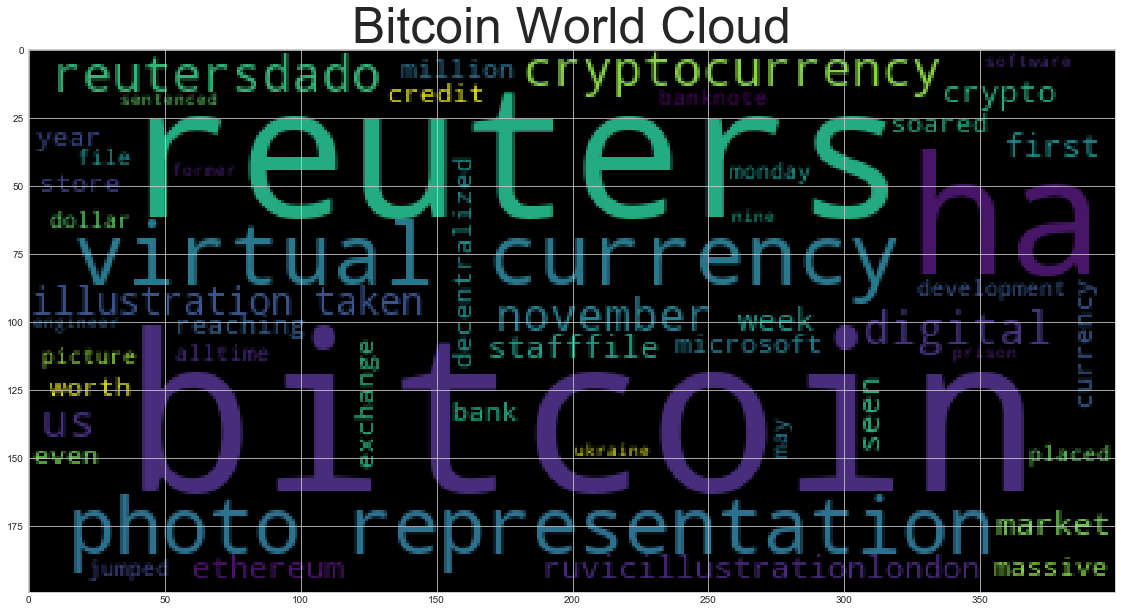

In [33]:
# Generate the Bitcoin word cloud
bitcoin_input_words = ' '.join(bitcoin_words)
wc = WordCloud(max_words=50).generate(bitcoin_input_words)
plt.title("Bitcoin World Cloud", fontsize=50)
plt.imshow(wc)

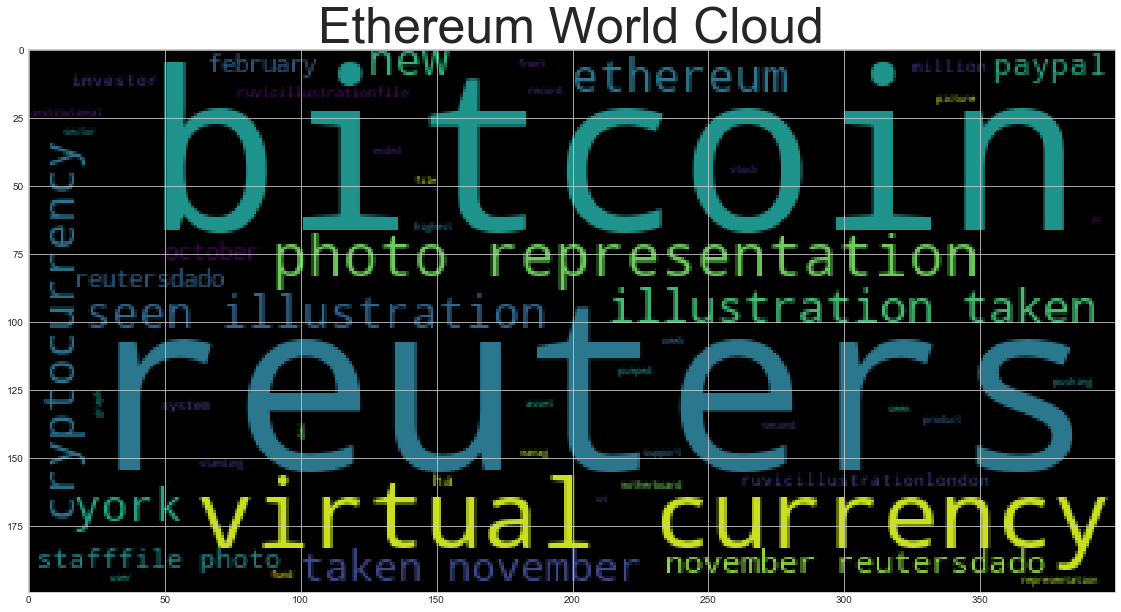

In [34]:
# Generate the Ethereum word cloud
ethereum_input_words = ' '.join(ethereum_words)
wc = WordCloud(max_words=50).generate(ethereum_input_words)
plt.title("Ethereum World Cloud", fontsize=50)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [35]:
import spacy
from spacy import displacy

In [36]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [37]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [55]:
# Concatenate all of the bitcoin text together
bitcoin_all_list = []

for index, article in bitcoin_df.iterrows():
    try:
        bitcoin_all_list.append(article["text"])
        
    except AttributeError:
        pass
    
    
bitcoin_all_string= ','.join(bitcoin_all_list)

In [56]:
# Run the NER processor on all of the text
bitcoin_text = nlp(bitcoin_all_string)

# Add a title to the document
bitcoin_text.user_data["title"] = "Bitcoin NER"

In [57]:
# Render the visualization
displacy.render(bitcoin_text, style='ent')

In [59]:
# List all Entities
#entities = [ent.text.lower().replace(' ', '_') for ent in bitcoin_text.ents]
entities = [ent.text.lower() for ent in bitcoin_text.ents]
entities

['microsoft',
 'ukraine',
 'nine years',
 'more than $10 million',
 'microsoft',
 '2016 to 2018',
 'first',
 'bitcoin',
 'us',
 'first',
 'us',
 'october',
 'november 2017',
 'two-month',
 'bitcoin',
 '10,000',
 'first',
 'the next 20 days',
 '19,665',
 'digital yuan',
 'the people’s bank of china',
 'the past few weeks',
 'bitcoin',
 'digital',
 'hype',
 'mexico',
 '$62 million',
 'u.s.',
 'november',
 'today',
 '500',
 '10.8 percent',
 'november',
 'monthly',
 'april',
 'fourth',
 'chars],maisie williams',
 'arya stark',
 'lady catelyn',
 'eddard',
 'acolyte',
 'the faceless men',
 'monday',
 '7',
 'bitcoin',
 'above $18,000',
 'tuesday',
 'evening',
 'december 2017',
 'this week',
 'more than $18,000',
 'bitcoin',
 'march 13, 2020',
 'reuters/',
 'tom wilson',
 'justin harperbusiness',
 'bbc news',
 'bitcoin',
 'above $17,000',
 '12,800',
 'three-year',
 'this week',
 'reuters',
 'bitcoin',
 'november 19, 2020',
 'reuters/dado ruvic/illustration',
 'reuters',
 'bitcoin',
 'february 

---

## Ethereum NER

In [60]:
# Concatenate all of the ethereum text together
ethereum_all_list = []

for index, article in ethereum_df.iterrows():
    try:
        ethereum_all_list.append(article["text"])
        
    except AttributeError:
        pass
    
    
ethereum_all_string= ','.join(ethereum_all_list)

In [61]:
# Run the NER processor on all of the text
ethereum_text = nlp(ethereum_all_string)

# Add a title to the document
ethereum_text.user_data["title"] = "Ethereum NER"

In [62]:
# Render the visualization
displacy.render(ethereum_text, style='ent')

In [63]:
# List all Entities
#entities = [ent.text.lower().replace(' ', '_') for ent in bitcoin_text.ents]
entities = [ent.text.lower() for ent in ethereum_text.ents]
entities

['paypal',
 'us',
 'first',
 'us',
 'october',
 'february 3, 2018',
 'reuters/',
 'reuters',
 'chars],file photo:',
 'february 3, 2018',
 'reuters/',
 'reuters',
 'reuters',
 'xrp',
 'monday',
 'chars],new york',
 'reuters',
 '$429 million',
 'the week ended dec. 7',
 'second',
 'chars],new york',
 'reuters',
 '$429 million',
 'the week ended dec. 7',
 'second',
 'the generosity network',
 '20,000',
 'reuters',
 'bitcoin',
 'november 19, 2020',
 'reuters/',
 'reuters',
 'bitcoin',
 'november 19, 2020',
 'reuters/',
 'new york times',
 'coinbase',
 'chars],these',
 'early february this year',
 'last month',
 'october',
 '$24 million',
 'reuters',
 'bitcoin',
 'november 19, 2020',
 'reuters/',
 'reuters',
 'reuters',
 'bitcoin',
 'november 19, 2020',
 'reuters/',
 'reuters',
 'reuters',
 'bitcoin',
 'november 19, 2020',
 'reuters/',
 'london',
 'reuters',
 'bitcoin',
 'reuters',
 'bitcoin',
 'u.s.',
 'may 26, 2020',
 'reuters/',
 'reuters',
 'hedera',
 'syrians',
 'hala systems',
 'paypa